<a href="https://colab.research.google.com/github/AlukweJonesTerah/ALGOS/blob/main/Sensor_Data_AFRICA_Air_Quality_Archive_Kisumu_November2018.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [104]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge

In [50]:
df = pd.read_csv("november_2018_sensor_data_archive.csv")

In [51]:
df.head()

sensor_id;sensor_type;location;lat;lon;timestamp;value_type;value
0  122;SDS011;56;-0.108;34.749;2018-11-24T10:49:0...               
1  122;SDS011;56;-0.108;34.749;2018-11-24T10:49:0...               
2  121;DHT22;56;-0.108;34.749;2018-11-24T10:49:07...               
3  121;DHT22;56;-0.108;34.749;2018-11-24T10:49:07...               
4  122;SDS011;56;-0.108;34.749;2018-11-24T10:52:2...

In [52]:
df.columns

Index(['sensor_id;sensor_type;location;lat;lon;timestamp;value_type;value'], dtype='object')

The structure of the data/dataframe should be

1. sensor_id - 122;
2. sensor_type - SDS011;
3. location - 56;
4. lat - -0.108;
5. lon - 34.749;
6. timestamp - 2018-11-24T10:49:06.216079+00:00;
7. value_type - P2;
8. value - 8.65

I will make a new dataframe with each column aligning to each value as indicated above  

## Problems to face there might be empty rows

In [53]:
df.shape

(66574, 1)

In [54]:
df.isnull().sum()

sensor_id;sensor_type;location;lat;lon;timestamp;value_type;value    0
dtype: int64

In [55]:
new_columns = ["sensor_id", "sensor_type", "location", "lat", "lon", "timestamp", "value_type", "value"]
df[new_columns] = df['sensor_id;sensor_type;location;lat;lon;timestamp;value_type;value'].str.split(";", expand=True)

In [56]:
df.drop("sensor_id;sensor_type;location;lat;lon;timestamp;value_type;value", axis=1, inplace=True)

In [57]:
df.shape

(66574, 8)

In [58]:
df.isnull().sum()

sensor_id      0
sensor_type    0
location       0
lat            0
lon            0
timestamp      0
value_type     0
value          0
dtype: int64

## Task 1 is done
we have a new dataframe of shape (66574, 8) and 0 nulls

next we need to check if all raws are with the correct types.

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66574 entries, 0 to 66573
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   sensor_id    66574 non-null  object
 1   sensor_type  66574 non-null  object
 2   location     66574 non-null  object
 3   lat          66574 non-null  object
 4   lon          66574 non-null  object
 5   timestamp    66574 non-null  object
 6   value_type   66574 non-null  object
 7   value        66574 non-null  object
dtypes: object(8)
memory usage: 4.1+ MB


In [60]:
df.head()

sensor_id sensor_type location     lat     lon  \
0       122      SDS011       56  -0.108  34.749   
1       122      SDS011       56  -0.108  34.749   
2       121       DHT22       56  -0.108  34.749   
3       121       DHT22       56  -0.108  34.749   
4       122      SDS011       56  -0.108  34.749   

                          timestamp   value_type  value  
0  2018-11-24T10:49:06.216079+00:00           P2   8.65  
1  2018-11-24T10:49:06.216079+00:00           P1   9.45  
2  2018-11-24T10:49:07.719863+00:00  temperature  31.70  
3  2018-11-24T10:49:07.719863+00:00     humidity  44.80  
4  2018-11-24T10:52:25.067433+00:00           P2   4.65

In [61]:
print(f' \n Sensor_id unique values: {df["sensor_id"].unique()}')
print(f' \n Senosor_type unique values: {df["sensor_type"].unique()}')
print(f' \n Location unique values: {df["location"].unique()}')
print(f' \n Latitude unique values: {df["lat"].unique()}')
print(f' \n Longitude unique values: {df["lon"].unique()}')
print(f' \n Timestamp unique values: {df["timestamp"].unique()}')
print(f' \n Value types unique values: {df["value_type"].unique()}')
print(f' \n Value unique values: {df["value"].unique()}')

 
 Sensor_id unique values: ['122' '121' '84' '83']
 
 Senosor_type unique values: ['SDS011' 'DHT22']
 
 Location unique values: ['56']
 
 Latitude unique values: ['-0.108']
 
 Longitude unique values: ['34.749']
 
 Timestamp unique values: ['2018-11-24T10:49:06.216079+00:00' '2018-11-24T10:49:07.719863+00:00'
 '2018-11-24T10:52:25.067433+00:00' ... '2018-11-30T23:58:58.909584+00:00'
 '2018-11-30T23:59:34.353157+00:00' '2018-11-30T23:59:35.813678+00:00']
 
 Value types unique values: ['P2' 'P1' 'temperature' 'humidity']
 
 Value unique values: ['8.65' '9.45' '31.70' ... '24.43' '60.75' '53.45']


In [62]:
df = df.set_index("timestamp")

In [63]:
df.duplicated().sum()

np.int64(58239)

In [64]:
df.to_csv("Sensor-Data-AFRICA-Air-Quality-Archive-Kisumu-November2018_Cleaded.csv")

## Time Series Prediction Using leaner regression, AR(AutoRegression) and ARMA (AutoRegression Moving Average) models

In [65]:
df_= pd.read_csv("Sensor-Data-AFRICA-Air-Quality-Archive-Kisumu-November2018_Cleaded.csv")
df.head()

sensor_id sensor_type location     lat  \
timestamp                                                                 
2018-11-24T10:49:06.216079+00:00       122      SDS011       56  -0.108   
2018-11-24T10:49:06.216079+00:00       122      SDS011       56  -0.108   
2018-11-24T10:49:07.719863+00:00       121       DHT22       56  -0.108   
2018-11-24T10:49:07.719863+00:00       121       DHT22       56  -0.108   
2018-11-24T10:52:25.067433+00:00       122      SDS011       56  -0.108   

                                     lon   value_type  value  
timestamp                                                     
2018-11-24T10:49:06.216079+00:00  34.749           P2   8.65  
2018-11-24T10:49:06.216079+00:00  34.749           P1   9.45  
2018-11-24T10:49:07.719863+00:00  34.749  temperature  31.70  
2018-11-24T10:49:07.719863+00:00  34.749     humidity  44.80  
2018-11-24T10:52:25.067433+00:00  34.749           P2   4.65

In [66]:
#  coverting the selected columns to numerical data values and datetime timestamp index to date

df_[["sensor_id", "location", "lat", "lon", "value"]] = df_[["sensor_id", "location", "lat", "lon", "value"]].apply(pd.to_numeric)
df_.index = pd.DatetimeIndex(df_.index)

In [67]:
df_.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 66574 entries, 1970-01-01 00:00:00 to 1970-01-01 00:00:00.000066573
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   timestamp    66574 non-null  object 
 1   sensor_id    66574 non-null  int64  
 2   sensor_type  66574 non-null  object 
 3   location     66574 non-null  int64  
 4   lat          66574 non-null  float64
 5   lon          66574 non-null  float64
 6   value_type   66574 non-null  object 
 7   value        66574 non-null  float64
dtypes: float64(3), int64(2), object(3)
memory usage: 4.6+ MB


In [68]:
df_.index = df_.index.tz_localize("UTC").tz_convert("Africa/Nairobi")

In [69]:
df.head()

sensor_id sensor_type location     lat  \
timestamp                                                                 
2018-11-24T10:49:06.216079+00:00       122      SDS011       56  -0.108   
2018-11-24T10:49:06.216079+00:00       122      SDS011       56  -0.108   
2018-11-24T10:49:07.719863+00:00       121       DHT22       56  -0.108   
2018-11-24T10:49:07.719863+00:00       121       DHT22       56  -0.108   
2018-11-24T10:52:25.067433+00:00       122      SDS011       56  -0.108   

                                     lon   value_type  value  
timestamp                                                     
2018-11-24T10:49:06.216079+00:00  34.749           P2   8.65  
2018-11-24T10:49:06.216079+00:00  34.749           P1   9.45  
2018-11-24T10:49:07.719863+00:00  34.749  temperature  31.70  
2018-11-24T10:49:07.719863+00:00  34.749     humidity  44.80  
2018-11-24T10:52:25.067433+00:00  34.749           P2   4.65

In [70]:
fig = px.scatter_mapbox(
    df_,
    lat="lat",
    lon="lon",
    color="value_type",
    size="value",
    center={"lat": -0.108, "lon": 34.749},
    mapbox_style="stamen-terrain",
    color_continuous_scale=px.colors.cyclical.IceFire,
    hover_data=["sensor_id", "value_type", "value", "sensor_type"],
    hover_name="sensor_id",
    zoom=10,
    height=600,
    width=800
  )
fig.update_layout(mapbox_style="open-street-map")
fig.show()

Using Linear Regression model

(sub t - lag of 1) = t - 1

#y(t) = b(0) - b(1)*y(t-1)

where y(t) is value to be

In [71]:
filtered_P2_data = df[df["value_type"] == "P2"]
filtered_P2_data.head()

sensor_id sensor_type location     lat  \
timestamp                                                                 
2018-11-24T10:49:06.216079+00:00       122      SDS011       56  -0.108   
2018-11-24T10:52:25.067433+00:00       122      SDS011       56  -0.108   
2018-11-24T10:54:55.192943+00:00       122      SDS011       56  -0.108   
2018-11-24T10:57:24.370103+00:00       122      SDS011       56  -0.108   
2018-11-24T10:59:54.428130+00:00       122      SDS011       56  -0.108   

                                     lon value_type value  
timestamp                                                  
2018-11-24T10:49:06.216079+00:00  34.749         P2  8.65  
2018-11-24T10:52:25.067433+00:00  34.749         P2  4.65  
2018-11-24T10:54:55.192943+00:00  34.749         P2  4.45  
2018-11-24T10:57:24.370103+00:00  34.749         P2  4.40  
2018-11-24T10:59:54.428130+00:00  34.749         P2  7.20

In [72]:
filtered_P2_data.shape

(17123, 7)

In [73]:
filtered_P2_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17123 entries, 2018-11-24T10:49:06.216079+00:00 to 2018-11-30T23:59:34.353157+00:00
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   sensor_id    17123 non-null  object
 1   sensor_type  17123 non-null  object
 2   location     17123 non-null  object
 3   lat          17123 non-null  object
 4   lon          17123 non-null  object
 5   value_type   17123 non-null  object
 6   value        17123 non-null  object
dtypes: object(7)
memory usage: 1.0+ MB


In [74]:
filtered_P2_data.to_csv("Sensor-Data-AFRICA-Air-Quality-Archive-Kisumu-November2018_Cleaded_P2.csv")

In [75]:
y = pd.read_csv("Sensor-Data-AFRICA-Air-Quality-Archive-Kisumu-November2018_Cleaded_P2.csv", index_col="timestamp")
y.head()

sensor_id sensor_type  location    lat  \
timestamp                                                                  
2018-11-24T10:49:06.216079+00:00        122      SDS011        56 -0.108   
2018-11-24T10:52:25.067433+00:00        122      SDS011        56 -0.108   
2018-11-24T10:54:55.192943+00:00        122      SDS011        56 -0.108   
2018-11-24T10:57:24.370103+00:00        122      SDS011        56 -0.108   
2018-11-24T10:59:54.428130+00:00        122      SDS011        56 -0.108   

                                     lon value_type  value  
timestamp                                                   
2018-11-24T10:49:06.216079+00:00  34.749         P2   8.65  
2018-11-24T10:52:25.067433+00:00  34.749         P2   4.65  
2018-11-24T10:54:55.192943+00:00  34.749         P2   4.45  
2018-11-24T10:57:24.370103+00:00  34.749         P2   4.40  
2018-11-24T10:59:54.428130+00:00  34.749         P2   7.20

In [76]:
y[["sensor_id", "location", "lat",	"lon", "value"]] = y[["sensor_id", "location", "lat",	"lon", "value"]].apply(pd.to_numeric)

In [77]:
y.index = pd.DatetimeIndex(y.index)

<Axes: title={'center': 'Distribution of PM2.5 readings'}>

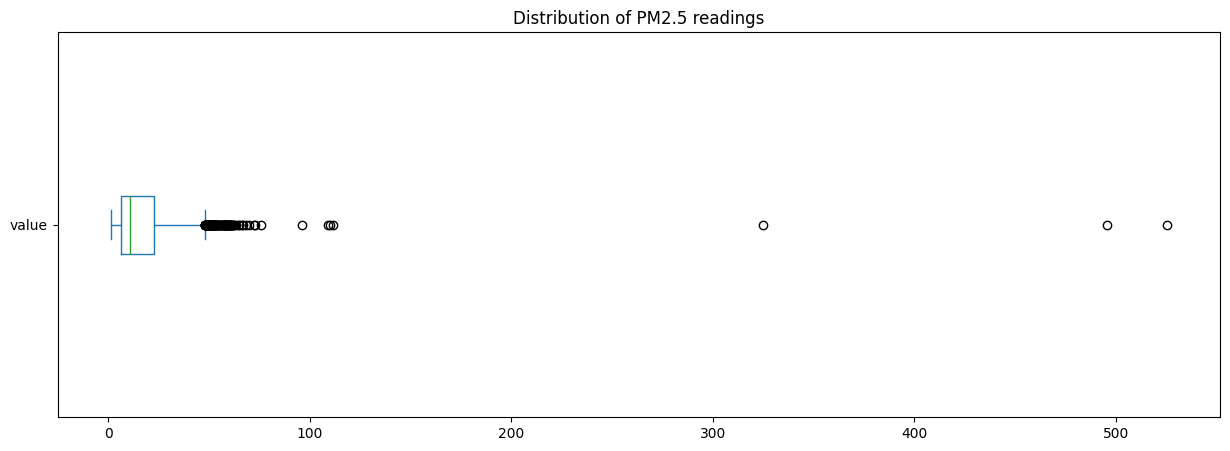

In [78]:
fig, ax = plt.subplots(figsize=(15, 5))
y["value"].plot(kind="box", vert=False, title="Distribution of PM2.5 readings", ax=ax)

In [79]:
y = y[y["value"] < 200]

In [80]:
y.head()

sensor_id sensor_type  location    lat  \
timestamp                                                                  
2018-11-24 10:49:06.216079+00:00        122      SDS011        56 -0.108   
2018-11-24 10:52:25.067433+00:00        122      SDS011        56 -0.108   
2018-11-24 10:54:55.192943+00:00        122      SDS011        56 -0.108   
2018-11-24 10:57:24.370103+00:00        122      SDS011        56 -0.108   
2018-11-24 10:59:54.428130+00:00        122      SDS011        56 -0.108   

                                     lon value_type  value  
timestamp                                                   
2018-11-24 10:49:06.216079+00:00  34.749         P2   8.65  
2018-11-24 10:52:25.067433+00:00  34.749         P2   4.65  
2018-11-24 10:54:55.192943+00:00  34.749         P2   4.45  
2018-11-24 10:57:24.370103+00:00  34.749         P2   4.40  
2018-11-24 10:59:54.428130+00:00  34.749         P2   7.20

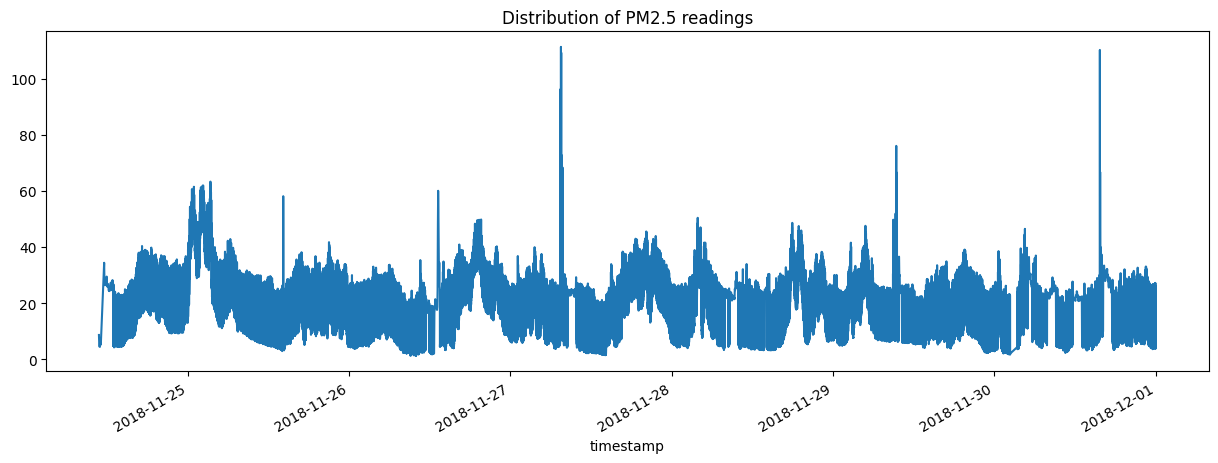

In [81]:
fig, ax = plt.subplots(figsize=(15, 5))
y["value"].plot(title="Distribution of PM2.5 readings", ax=ax)
fig.show()

In [82]:
y.isnull().sum()

sensor_id      0
sensor_type    0
location       0
lat            0
lon            0
value_type     0
value          0
dtype: int64

<ipython-input-83-2900958722>:1: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



<Axes: title={'center': 'Distribution of PM2.5 readings'}, xlabel='timestamp'>

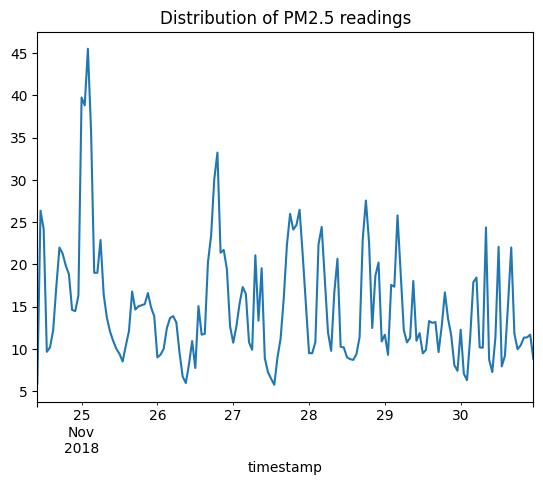

In [83]:
y["value"].resample("1h").mean().fillna(method="ffill").plot(title="Distribution of PM2.5 readings")

<Axes: title={'center': 'Distribution of PM2.5 readings'}, xlabel='timestamp', ylabel='PM2.5'>

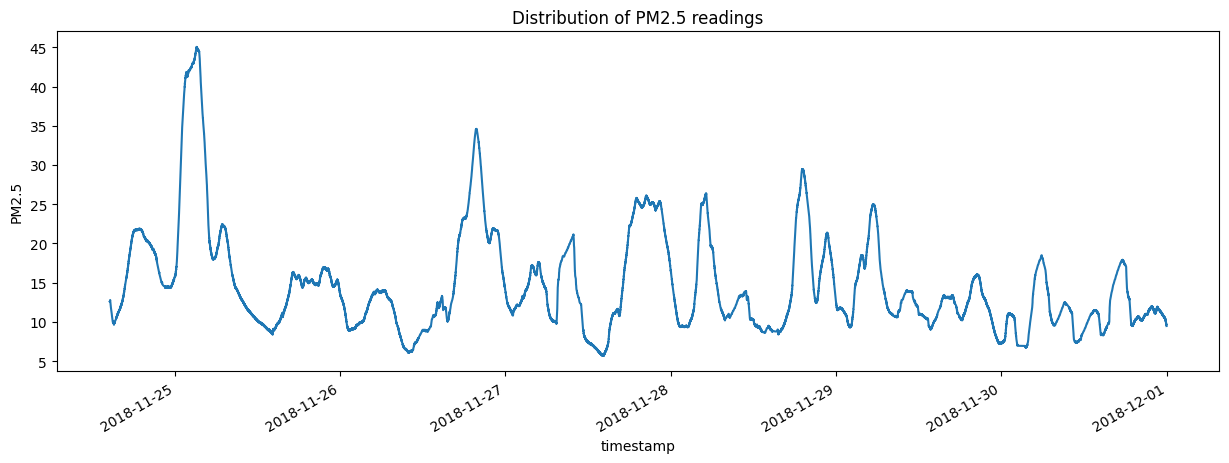

In [84]:
fig, ax = plt.subplots(figsize=(15, 5))
y["value"].rolling(168).mean().plot(ylabel="PM2.5", title="Distribution of PM2.5 readings", ax=ax)

In [85]:
y["value_L1"] = y["value"].shift(1)

In [86]:
y

sensor_id sensor_type  location    lat  \
timestamp                                                                  
2018-11-24 10:49:06.216079+00:00        122      SDS011        56 -0.108   
2018-11-24 10:52:25.067433+00:00        122      SDS011        56 -0.108   
2018-11-24 10:54:55.192943+00:00        122      SDS011        56 -0.108   
2018-11-24 10:57:24.370103+00:00        122      SDS011        56 -0.108   
2018-11-24 10:59:54.428130+00:00        122      SDS011        56 -0.108   
...                                     ...         ...       ...    ...   
2018-11-30 23:57:43.399370+00:00         84      SDS011        56 -0.108   
2018-11-30 23:58:12.070911+00:00        122      SDS011        56 -0.108   
2018-11-30 23:58:20.346095+00:00         84      SDS011        56 -0.108   
2018-11-30 23:58:57.421409+00:00         84      SDS011        56 -0.108   
2018-11-30 23:59:34.353157+00:00         84      SDS011        56 -0.108   

                                     lon value_type  value  value_L1  
timestamp                                                             
2018-11-24 10:49:06.216079+00:00  34.749         P2   8.65       NaN  
2018-11-24 10:52:25.067433+00:00  34.749         P2   4.65      8.65  
2018-11-24 10:54:55.192943+00:00  34.749         P2   4.45      4.65  
2018-11-24 10:57:24.370103+00:00  34.749         P2   4.40      4.45  
2018-11-24 10:59:54.428130+00:00  34.749         P2   7.20      4.40  
...                                  ...        ...    ...       ...  
2018-11-30 23:57:43.399370+00:00  34.749         P2   4.10      4.10  
2018-11-30 23:58:12.070911+00:00  34.749         P2  26.08      4.10  
2018-11-30 23:58:20.346095+00:00  34.749         P2   4.07     26.08  
2018-11-30 23:58:57.421409+00:00  34.749         P2   3.80      4.07  
2018-11-30 23:59:34.353157+00:00  34.749         P2   4.55      3.80  

[17120 rows x 8 columns]

In [87]:
y.isnull().sum()

sensor_id      0
sensor_type    0
location       0
lat            0
lon            0
value_type     0
value          0
value_L1       1
dtype: int64

In [88]:
y.dropna(inplace=True)

In [89]:
y.head()

sensor_id sensor_type  location    lat  \
timestamp                                                                  
2018-11-24 10:52:25.067433+00:00        122      SDS011        56 -0.108   
2018-11-24 10:54:55.192943+00:00        122      SDS011        56 -0.108   
2018-11-24 10:57:24.370103+00:00        122      SDS011        56 -0.108   
2018-11-24 10:59:54.428130+00:00        122      SDS011        56 -0.108   
2018-11-24 11:05:48.815478+00:00         84      SDS011        56 -0.108   

                                     lon value_type  value  value_L1  
timestamp                                                             
2018-11-24 10:52:25.067433+00:00  34.749         P2   4.65      8.65  
2018-11-24 10:54:55.192943+00:00  34.749         P2   4.45      4.65  
2018-11-24 10:57:24.370103+00:00  34.749         P2   4.40      4.45  
2018-11-24 10:59:54.428130+00:00  34.749         P2   7.20      4.40  
2018-11-24 11:05:48.815478+00:00  34.749         P2   5.20      7.20

In [90]:
y["value"].corr(y['value_L1'])

np.float64(0.3783080181351848)

In [91]:
y.select_dtypes(include="number").corr()

sensor_id  location  lat  lon     value  value_L1
sensor_id   1.000000       NaN  NaN  NaN  0.684586 -0.143630
location         NaN       NaN  NaN  NaN       NaN       NaN
lat              NaN       NaN  NaN  NaN       NaN       NaN
lon              NaN       NaN  NaN  NaN       NaN       NaN
value       0.684586       NaN  NaN  NaN  1.000000  0.378308
value_L1   -0.143630       NaN  NaN  NaN  0.378308  1.000000

Text(0, 0.5, 'value')

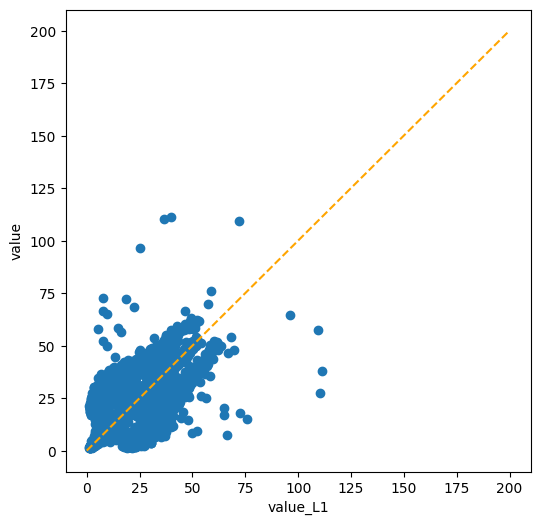

In [92]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(y["value_L1"], y["value"])
ax.plot([0, 200], [0, 200], linestyle="--", color="orange")
ax.set_xlabel("value_L1")
ax.set_ylabel("value")

In [99]:
y_ = y["value"]
print(len(y_))
X = y["value_L1"]
print(len(X))

17119
17119


In [97]:
X

timestamp
2018-11-24 10:52:25.067433+00:00     8.65
2018-11-24 10:54:55.192943+00:00     4.65
2018-11-24 10:57:24.370103+00:00     4.45
2018-11-24 10:59:54.428130+00:00     4.40
2018-11-24 11:05:48.815478+00:00     7.20
                                    ...  
2018-11-30 23:57:43.399370+00:00     4.10
2018-11-30 23:58:12.070911+00:00     4.10
2018-11-30 23:58:20.346095+00:00    26.08
2018-11-30 23:58:57.421409+00:00     4.07
2018-11-30 23:59:34.353157+00:00     3.80
Name: value_L1, Length: 17119, dtype: float64

In [121]:
cutoff = int(len(X) * 0.9)
X_train, X_test = X[:cutoff], X[cutoff:]
y_train, y_test = y_[:cutoff], y_[cutoff:]

In [122]:
len(X_train) + len(X_test) == len(X)
len(y_train) +  len(y_test) == len(y_)

True

# Base Line Model


In [123]:
y_pred_baseline= [y_train.mean()] * len(y_train)
mae_baseline = mean_absolute_error(y_train, y_pred_baseline)
print("Mean P2 Reading:", round(y_train.mean(), 2))
print("Baseline MAE:", round(mae_baseline, 2))

Mean P2 Reading: 15.43
Baseline MAE: 9.17


Iteration


In [124]:
linear_model = LinearRegression()
linear_model.fit(X_train.values.reshape(-1, 1), y_train)

LinearRegression()

In [125]:
linear_model.predict(X_train.values.reshape(-1, 1))

array([12.79601519, 11.24095353, 11.16320045, ..., 11.69580907,
       11.84353993, 11.85131523])

In [126]:
linear_model.predict(X_test.values.reshape(-1, 1))

array([11.59084241, 19.92208525, 11.68025845, ..., 19.57219637,
       11.01546959, 10.91050293])

In [127]:
training_mae = mean_absolute_error(y_train, linear_model.predict(X_train.values.reshape(-1, 1)))
testing_mae = mean_absolute_error(y_test, linear_model.predict(X_test.values.reshape(-1, 1)))
print("Training MAE:", round(training_mae, 2))
print("Testing MAE:", round(testing_mae, 2))

Training MAE: 8.29
Testing MAE: 8.81


In [128]:
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train.values.reshape(-1, 1), y_train)

Ridge(alpha=0.1)

In [129]:
ridge_model.predict(X_train.values.reshape(-1, 1))

array([12.79601533, 11.24095375, 11.16320067, ..., 11.69580927,
       11.84354012, 11.85131542])

In [130]:
ridge_model.predict(X_test.values.reshape(-1, 1))

array([11.59084261, 19.92208501, 11.68025865, ..., 19.57219615,
       11.01546983, 10.91050317])

In [131]:
training_mae = mean_absolute_error(y_train, ridge_model.predict(X_train.values.reshape(-1, 1)))
testing_mae = mean_absolute_error(y_test, ridge_model.predict(X_test.values.reshape(-1, 1)))
print("Training MAE:", round(training_mae, 2))
print("Testing MAE:", round(testing_mae, 2))

Training MAE: 8.29
Testing MAE: 8.81
